<a href="https://colab.research.google.com/github/jisusP/MachineLearning/blob/main/SVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sklearn
import pandas as pd
ruta = "/content/etanol_metanol_gasolina.xlsx"
df = pd.read_excel(ruta)
df

In [ ]:
import sklearn
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

x = df.drop(["Unnamed: 0", "Methanol", "Etanol", "Gas"], axis = 1)
y = df.iloc[:,[1,2,3]]
x.columns = x.columns.astype(str)
pca = PCA(n_components=50)
x_pca = pca.fit_transform(x)


"""x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2)
algoritmo = SVR(kernel="rbf")
algoritmo.fit(x_train, y_train)

composition = algoritmo.predict(x_test)"""

In [ ]:
"""y_met = y.iloc[:,0]
y_et = y["Etanol"]
y_gas = y['Gas']"""
#x_met_train, x_met_test, y_met_train, y_met_test = train_test_split(x_pca, y_met, test_size=0.2)
algoritmo = SVC(kernel="rbf")
algoritmo.fit(x_met_train, y_met_train)

composition = algoritmo.predict(x_met_test)

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error



# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Escalar las variables predictoras
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo PLSR
pls_model = PLSRegression(n_components=3)

# Entrenar el modelo
pls_model.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = pls_model.predict(X_test_scaled)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"{pls_model.score}")


Mean Squared Error: 1.9350216437602759
<bound method RegressorMixin.score of PLSRegression(n_components=3)>


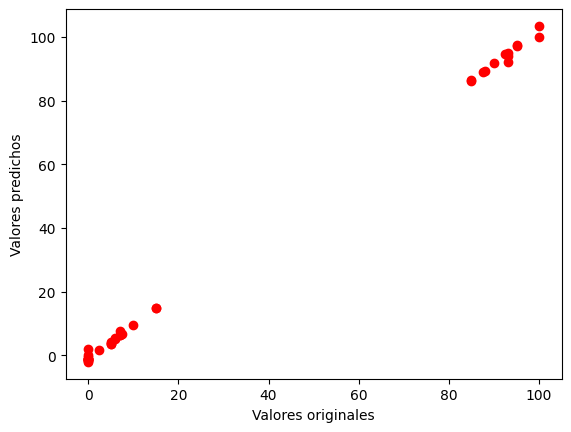

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(y_test, y_pred, color="red")
plt.xlabel("Valores originales")
plt.ylabel("Valores predichos")
plt.show()
